<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/Paisa_Bazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TITLE OF THE PROJECT: # Paisabazaar Banking Fraud Analysis

In [ ]:
# PROJECT SUMMARY:
The project was carried out to gain insights into customer financial behavior,
with a particular focus on credit score classification and fraud detection.
Since Paisabazaar is a financial services platform that helps individuals apply for loans and credit products,
understanding creditworthiness is essential for reducing risks, improving loan approval accuracy, and offering the right financial solutions.
Through this project, I applied EDA techniques to study the dataset, extract meaningful insights,
and present actionable conclusions for decision-making.

The project began with data exploration, where I examined the dataset’s size, structure, and summary statistics.
I also created a data dictionary to define each feature, such as income, outstanding debt, number of loans, monthly balance, credit card usage,
and repayment history. This step ensured a clear understanding of the dataset before moving to deeper analysis.

Next, I worked on data cleaning and preprocessing.
Financial data often contains null values, missing entries, and inconsistencies, which can reduce the quality of analysis.
To address this, I handled missing values through appropriate techniques,
removed duplicate or irrelevant records, and standardized the dataset to maintain accuracy.
Cleaning the dataset was a critical step to ensure that later analysis produced reliable insights.

I conducted correlation studies and descriptive statistics to determine which variables strongly influenced credit scores.
For instance, income was observed to have a positive association with higher scores,
while outstanding debt and multiple active loans showed negative impacts.
Similarly, monthly balance and repayment patterns reflected financial discipline,
helping to differentiate customers with strong versus weak creditworthiness.

To make these findings more interpretable, I employed a range of data visualizations:

Boxplots were used to highlight differences in income across credit score categories.

Bar plots revealed how the number of loans related to credit scores.

Scatter plots illustrated the relationship between outstanding debt and monthly balances.

Heatmaps provided a consolidated view of correlations across all numerical features.

Histograms showed the distribution of credit scores among customers.

These visualizations made it easy to identify not just patterns but also anomalies that may point toward fraudulent activity.
For example, cases of high outstanding debt with very low monthly balances stood out as possible risk indicators.

From a coding perspective, I ensured the project maintained modularity and readability.
Reusable functions were developed for tasks such as data cleaning, visualization, and correlation analysis.
Code was consistently documented with comments, and outputs were formatted clearly to improve presentation quality.
This approach made the notebook easier to maintain and adaptable for similar projects in the future.

Finally, the project concluded with a summary of insights and recommendations.
The analysis highlighted the most influential factors affecting credit scores, such as income stability, debt levels, and repayment history.
It also flagged irregular repayment behaviors that could help in detecting fraud.
These findings provide actionable recommendations for Paisabazaar, including refining their loan approval strategies,
strengthening fraud detection systems, and offering tailored financial advice based on customer profiles.

In conclusion,
the project demonstrates how structured Exploratory Data Analysis can transform raw customer data into valuable insights for business operations.
By systematically exploring, cleaning, analyzing, and visualizing the dataset,
I was able to uncover meaningful patterns that enhance credit risk assessment, reduce the chance of fraud,
and support better financial decision-making.


In [ ]:
GITHUB LINK:

In [ ]:
# PROBLEM STATEMENT :
Financial institutions like Paisabazaar need to assess customer creditworthiness before approving loans or credit cards.
One of the key factors influencing credit scores is a customer’s annual income.
Customers with higher income levels often have better repayment capacity, while those with lower incomes may face difficulties in managing debts,
leading to poor credit scores.

The problem is to analyze the relationship between annual income and credit score categories (Good, Standard, Poor).
By identifying income differences across these groups, we can:

Understand how income impacts credit health.

Detect financial risk segments.

Provide insights for better loan approval strategies.


In [ ]:
PROJECT GENERAL GUIDELINES:
1. Understand the Objective
2. Dataset Exploration
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Visualizations
6. Insights & Findings
7. Code Modularity
8. Conclusion

In [ ]:
#STEP 1
# import the libraries
import pandas as pd # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns  # For advanced visualization

# Machine learning tools (model building + preprocessing)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files


In [ ]:
#STEP 2: LOAD THE DATA SET
# Import the files module from Google Colab to upload files
from google.colab import files
# Open a file upload dialog to allow the user to upload files
uploaded = files.upload()

Saving credit_data.csv to credit_data (1).csv


In [ ]:
#Load the data set
from google.colab import files
import pandas as pd


# Upload the CSV file interactively
uploaded = files.upload()

# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]

# Read the uploaded file into a pandas dataframe
df = pd.read_csv(filename)

# Clean column names remove spaces, special characters, make lowercase
df.columns = df.columns.str.strip().str.lower().str.replace('[^0-9a-zA-Z]+','_',regex=True)

print("Data Loaded")
print(df.shape)
print(df.columns.tolist())

Saving credit_data.csv to credit_data.csv
Data Loaded
(100000, 28)
['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'credit_mix', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'payment_of_min_amount', 'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour', 'monthly_balance', 'credit_score']


In [ ]:
# STEP 3: DATA EXPLORATION
Data Exploration is the initial step in data analysis where we carefully examine a dataset to understand its structure,
contents, and quality. It involves checking the size of the data, the types of variables,
summary statistics, patterns, missing values, and potential outliers.
The main goal is to build a clear understanding of the dataset before moving into deeper analysis or modeling.
# Load and inspect the credit dataset
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
df = pd.read_csv("credit_data.csv")

# Display the first 5 rows of the dataset
df.head()

# Dispaly the Last 5 rows of the dataset
df.tail()

# Show summary statistics for numeric columns
df.describe()

# Show dataset information: column types, non-null counts
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# Step 1: See all column names
print("Columns in dataset:")
print(df.columns)

# Step 2: Check missing values count
print("\nMissing values before handling:")
print(df.isnull().sum())

# Step 3: Handle missing values

# Fill numeric columns with median
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode (most common value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 4: Verify missing values again
print("\nMissing values after handling:")
print(df.isnull().sum())


Columns in dataset:
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Missing values before handling:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate          

/tmp/ipython-input-2728306149.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2728306149.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Missing values after handling:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
# Data dictionary
A data dictionary is like a glossary or guidebook for a dataset.
It explains what each column (feature) in the dataset means, what kind of values it contains (numbers, text, dates),
and sometimes the possible ranges or categories.

# This function builds a quick "data dictionary" to understand each column
def data_dictionary(df, sample_n=3):
    rows = []
    for col in df.columns:
        ser = df[col]
        rows.append({
            'column': col,  # Column Name
            'dtype': str(ser.dtype), # Data type
            'non_null': int(ser.notna().sum()), # Count of non-null values
            'null': int(ser.isna().sum()), # Count of missing values
            'missing_pct': round(ser.isna().mean()*100, 2), # % missing
            'nunique': int(ser.nunique(dropna=True)), # No. of unique values
            'examples': ', '.join(map(str, ser.dropna().unique()[:sample_n])) # Example values
        })
         # Sort by missing % so we know which columns need cleaning
    return pd.DataFrame(rows).sort_values('missing_pct', ascending=False).reset_index(drop=True)
# Generate data dictionary
dd = data_dictionary(df)
dd

,column,dtype,non_null,null,missing_pct,nunique,examples
0,id,int64,100000,0,0.0,100000,"5634, 5635, 5636"
1,customer_id,int64,100000,0,0.0,12500,"3392, 8625, 11708"
2,month,int64,100000,0,0.0,8,"1, 2, 3"
3,name,object,100000,0,0.0,10128,"Aaron Maashoh, Rick Rothackerj, Langep"
4,age,int64,100000,0,0.0,43,"23, 28, 34"
5,ssn,int64,100000,0,0.0,12500,"821000265, 4075839, 486853974"
6,occupation,object,100000,0,0.0,15,"Scientist, Teacher, Engineer"
7,annual_income,float64,100000,0,0.0,12488,"19114.12, 34847.84, 143162.64"
8,monthly_inhand_salary,float64,100000,0,0.0,13241,"1824.843333, 3037.986667, 12187.22"
9,num_bank_accounts,int64,100000,0,0.0,12,"3, 2, 1"


In [ ]:
# STEP 4 : HANDLE MISSING VALUES
In our dataset, some columns had missing or blank entries.
If we leave them as they are, theanalysis can give wrong results because the system doesn’t know how to treat those gaps.
To fix this, I handled the missing values in different ways depending on the situation.
For example, for numerical columns like income or balance,
I replaced the missing values with the average or median so that the overall trend remains accurate.
For categorical columns, I used the most frequent value or a placeholder like “Unknown.”
In some cases where too many values were missing and the data was not useful,
I dropped those rows or columns. This process ensures that the dataset is complete, reliable, and ready for accurate analysis.

import numpy as np # For numerical operations
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# Fill missing numeric values with median
for c in num_cols:
    if df[c].isna().any():
        df[c].fillna(df[c].median(), inplace=True)

# Fill missing categorical values with mode (most frequent)
for c in cat_cols:
    if df[c].isna().any():
        df[c].fillna(df[c].mode()[0], inplace=True)

print("Missing values handled")

Missing values handled


In [ ]:
# STEP 5 : OUTLIER DETECTION AND CAPPING USING IQR METHOD
Outliers are data points that are very different from the rest,
like an income value that is extremely high or low compared to most customers.
If we don’t handle them, they can mislead the analysis and create wrong insights.
To fix this, I used the IQR (Interquartile Range) method.
In this method, we calculate the middle spread of the data (between the 25th percentile and the 75th percentile) and set limits.
Any value outside these limits is considered an outlier.
Instead of removing them, I capped them to the nearest acceptable limit.
This way, the unusual values don’t distort the results, but we still keep all the data for analysis.
# Function to cap outliers using IQR
def iqr_cap(series):
    q1 = series.quantile(0.25) # 25th percentile
    q3 = series.quantile(0.75) # 75th percentile
    iqr = q3 - q1              # Interquartile range
    low = q1 - 1.5*iqr         # Lower limit
    high = q3 + 1.5*iqr        # Upper Limit
    return series.clip(lower=low, upper=high)

# Apply outlier capping to numeric columns
for c in num_cols:
    df[c] = iqr_cap(df[c])

print("Outliers capped")

Outliers capped


Saving credit_data.csv to credit_data (4).csv
Univariate Analysis - All Histograms Together


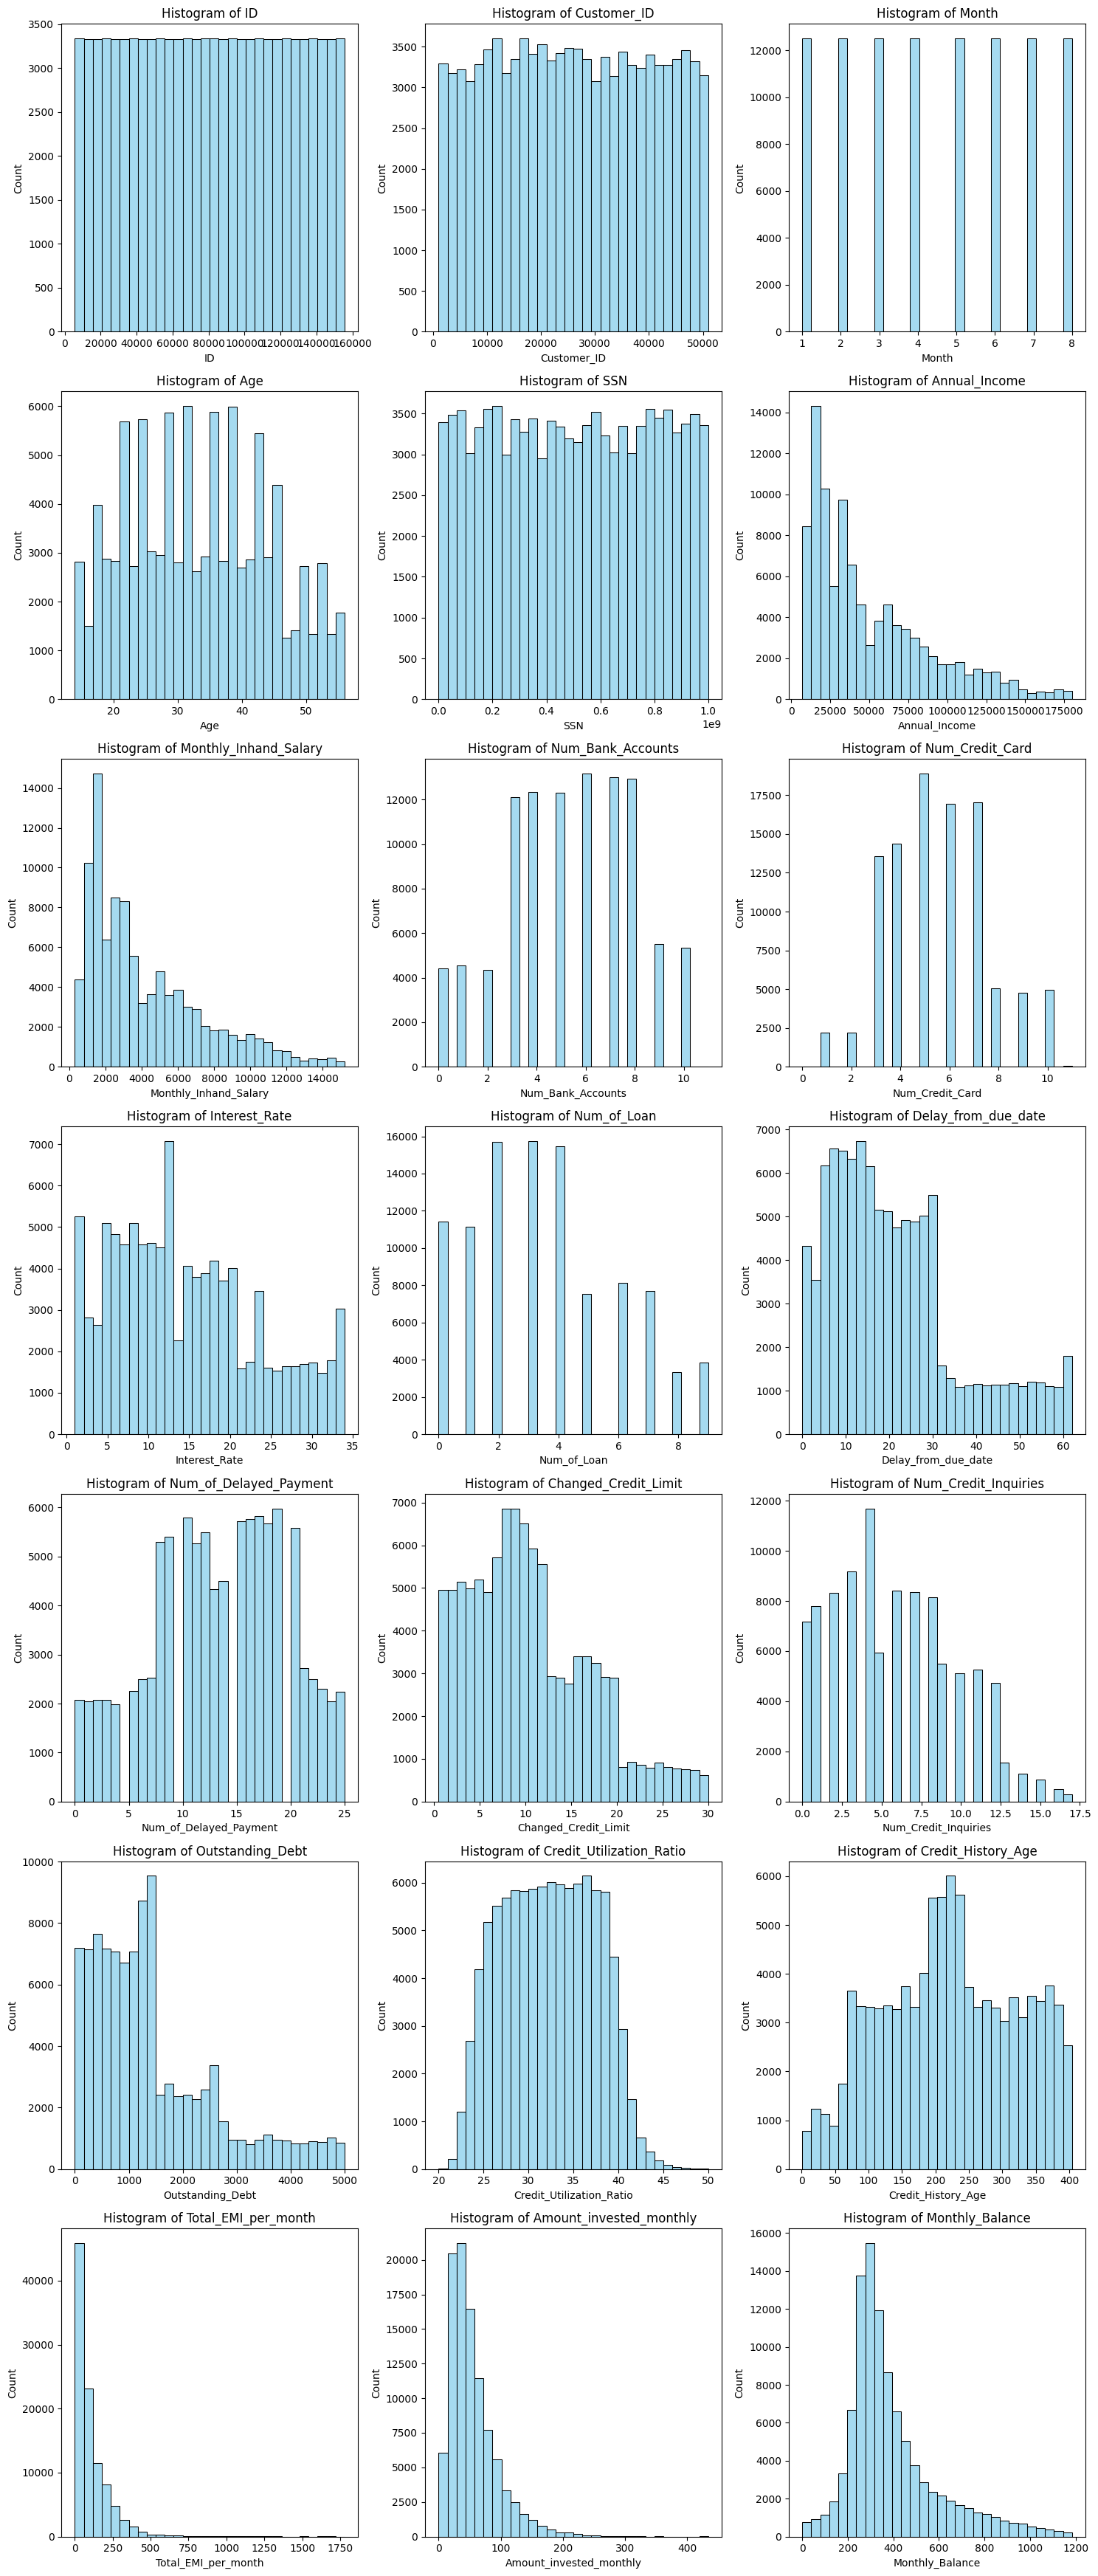

In [ ]:
# STEP 6 : EDA(Exploratory Data Analysis)
Exploratory Data Analysis (EDA) is the process of carefully examining and understanding a dataset before applying any advanced models or predictions.
The goal is to explore the data, identify patterns, detect errors, handle missing values, find outliers,
and understand relationships between variables.
EDA uses summary statistics, tables, and visualizations like histograms, scatter plots, box plots, and heatmaps
to make the data more meaningful.
In short, EDA helps us transform raw data into useful insights and ensures the dataset is clean,
consistent, and ready for deeper analysis or machine learning.

Univariate analysis means analyzing one variable (one column) at a time to understand its pattern or distribution.
For example, looking at just “Credit Score” to see how many customers fall into low, medium, or high categories.
It helps us find trends, spot missing values, check distributions, and detect outliers for each feature individually.
# Univariate Analysis(numerical features) - Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("credit_data.csv")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot all histograms in one figure
def all_histograms_one_plot(df, numerical_cols):
    n = len(numerical_cols)
    rows = math.ceil(n / 3)   # 3 plots per row
    plt.figure(figsize=(15, 5*rows))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(df[col], kde=False, bins=30, color="skyblue")
        plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

print("Univariate Analysis - All Histograms Together")
all_histograms_one_plot(df, numerical_cols)

Saving credit_data.csv to credit_data (5).csv
📊 Univariate Analysis - All KDE Plots Together


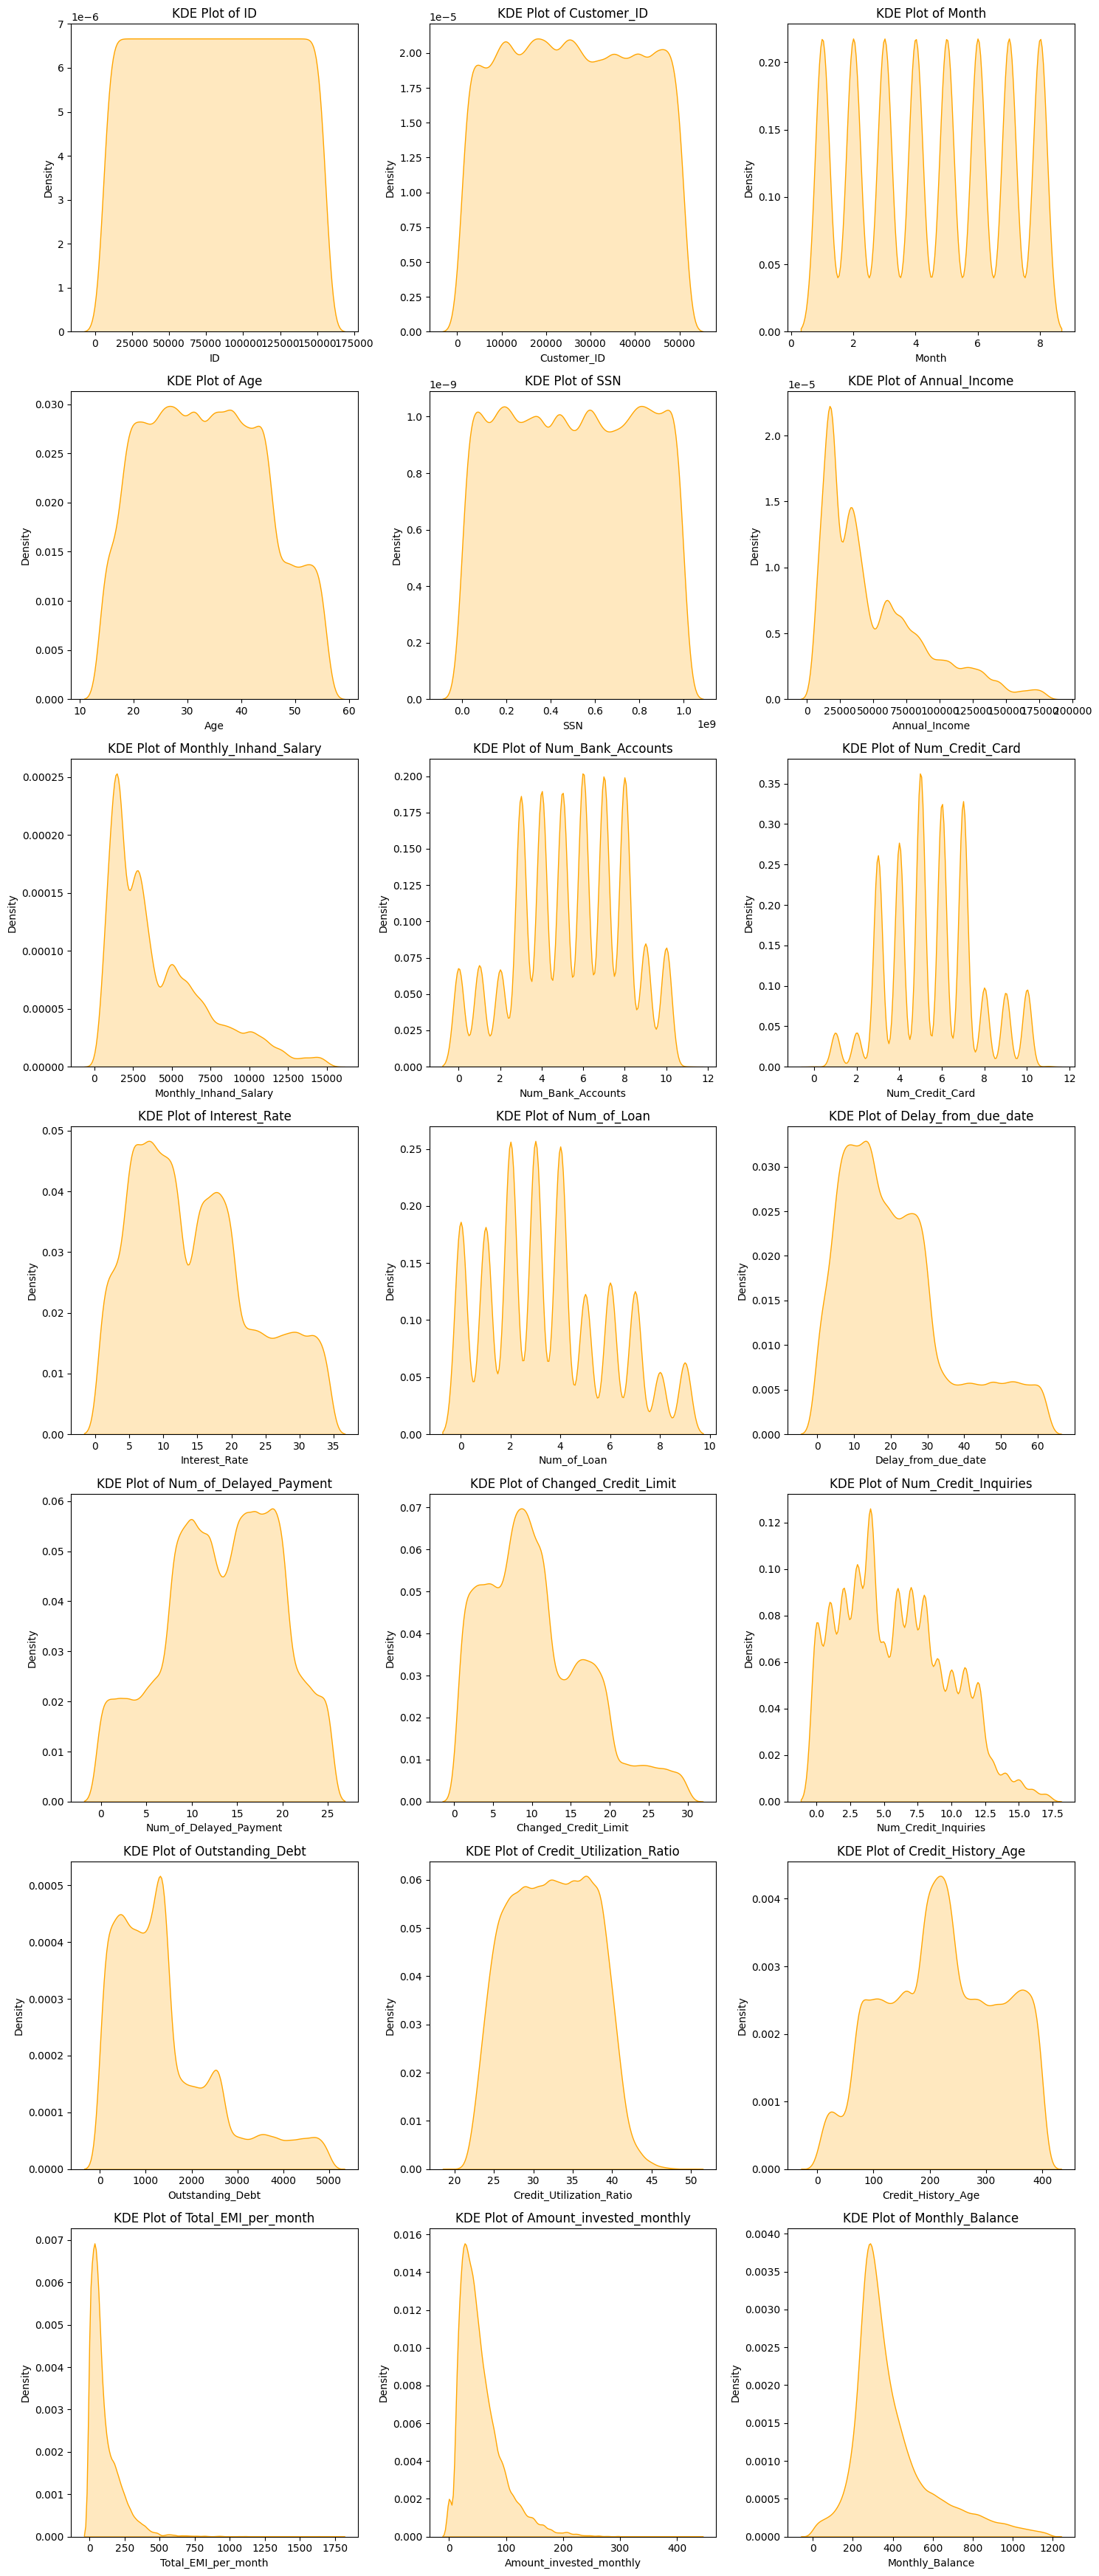

In [ ]:

# Univariate Analysis(numerical features) - KDE plot (Kernel Density Estimation)
A KDE plot (Kernel Density Estimation) shows the distribution of a single numerical variable in a smooth curve form.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("credit_data.csv")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot all KDE plots in one figure
def all_kde_one_plot(df, numerical_cols):
    n = len(numerical_cols)
    rows = math.ceil(n / 3)   # 3 plots per row
    plt.figure(figsize=(15, 5*rows))

    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(rows, 3, i)
        sns.kdeplot(df[col], fill=True, color="orange")
        plt.title(f"KDE Plot of {col}")

    plt.tight_layout()
    plt.show()

print("Univariate Analysis - All KDE Plots Together")
all_kde_one_plot(df, numerical_cols)


Saving credit_data.csv to credit_data (9).csv
Univariate Analysis - All Bar Charts (Top Categories)


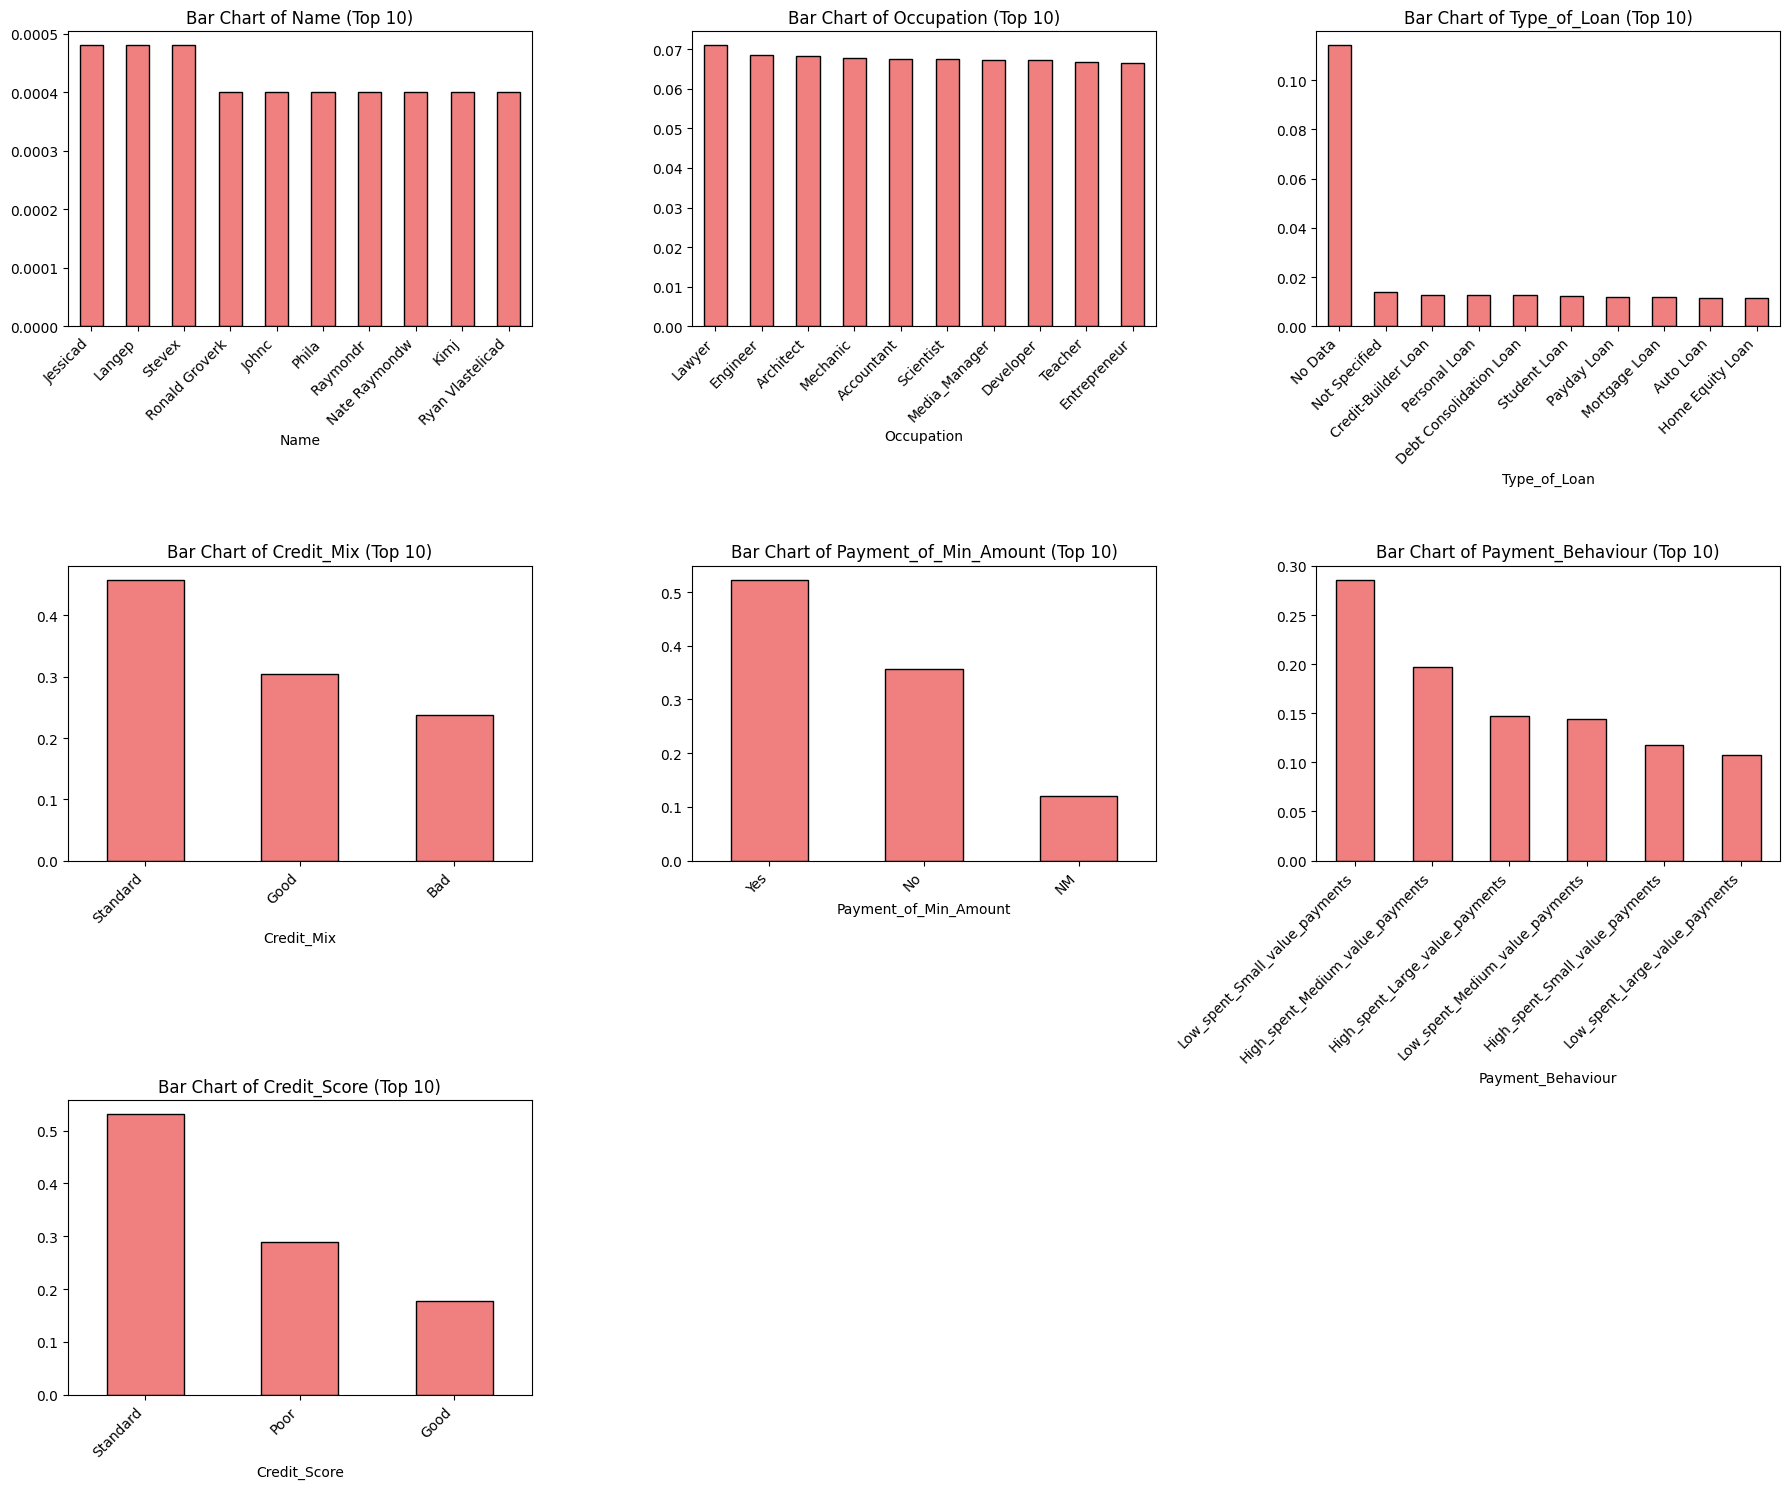

In [ ]:
# Univariate Analysis - Fixed Bar Charts (Categorical Features)
A fixed bar chart shows how often each category appears in the dataset.
It’s like counting how many customers belong to each group
(for example, high credit score vs. low credit score) and then displaying it visually so patterns are easy to understand.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("credit_data.csv")

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot all bar charts (top 10 categories, normalized %)
def all_barcharts_fixed(df, categorical_cols, top_n=10):
    n = len(categorical_cols)
    rows = math.ceil(n / 3)   # 3 plots per row
    plt.figure(figsize=(18, 5*rows))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, 3, i)
        df[col].value_counts(normalize=True).head(top_n).plot(
            kind='bar', color="lightcoral", edgecolor="black"
        )
        plt.title(f"Bar Chart of {col} (Top {top_n})")
        plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

print("Univariate Analysis - All Bar Charts (Top Categories)")
all_barcharts_fixed(df, categorical_cols, top_n=10)

/tmp/ipython-input-1821825831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set2")


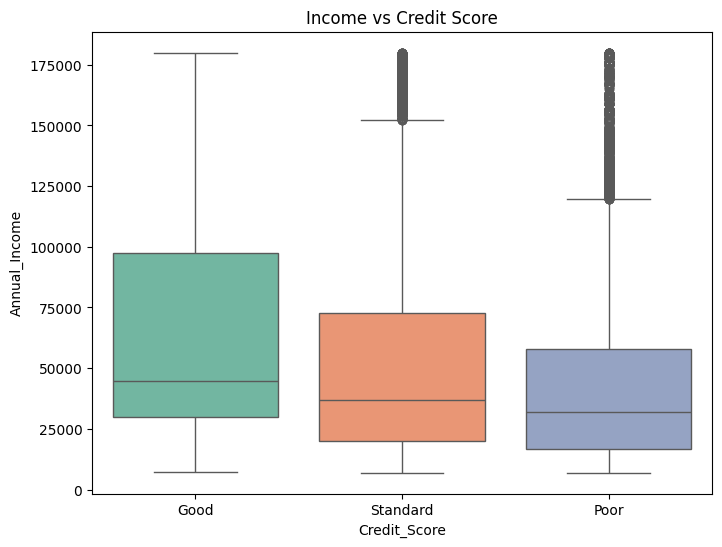

In [ ]:
# bivariate analysis
Bivariate analysis means studying the relationship between two variables to see how they are connected.
For example, comparing “Income” with “Credit Score” to check whether higher income leads to better credit scores,
or comparing “Outstanding Debt” with “Monthly Balance” to understand financial behavior.
This helps us identify correlations, dependencies, and key business insights from the data.

# Boxplot: Income vs Credit Score
plt.figure(figsize=(8,6))
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set2")
plt.title("Income vs Credit Score")
plt.show()


/tmp/ipython-input-2985326850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Credit_Score", y="Num_of_Loan", data=df, palette="pastel", estimator="mean")


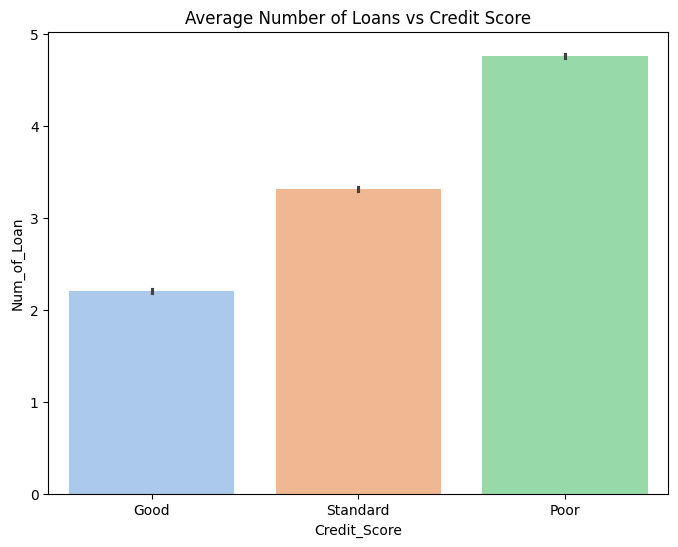

In [ ]:
bivariate
# Bar Plot: Number of Loans vs Credit Score
plt.figure(figsize=(8,6))
sns.barplot(x="Credit_Score", y="Num_of_Loan", data=df, palette="pastel", estimator="mean")
plt.title("Average Number of Loans vs Credit Score")
plt.show()


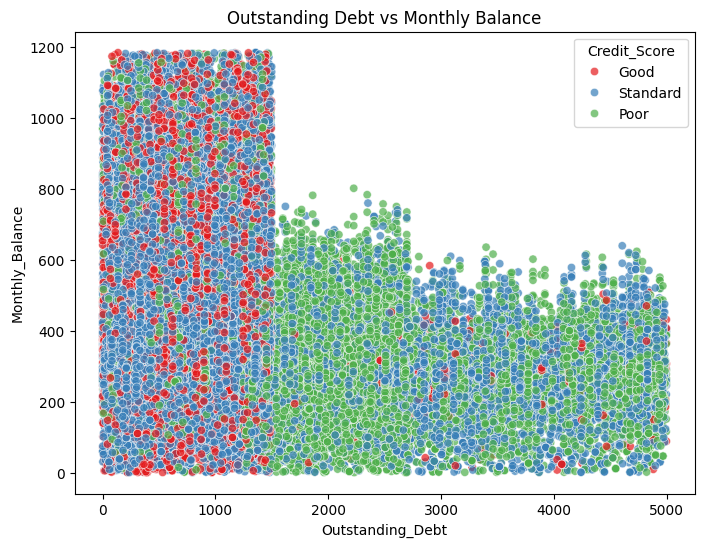

In [ ]:
bivariate
# Scatter Plot: Outstanding Debt vs Monthly Balance
plt.figure(figsize=(8,6))
sns.scatterplot(x="Outstanding_Debt", y="Monthly_Balance", hue="Credit_Score", data=df, alpha=0.7, palette="Set1")
plt.title("Outstanding Debt vs Monthly Balance")
plt.show()


/tmp/ipython-input-582323719.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('income_bin')['Credit_Score']


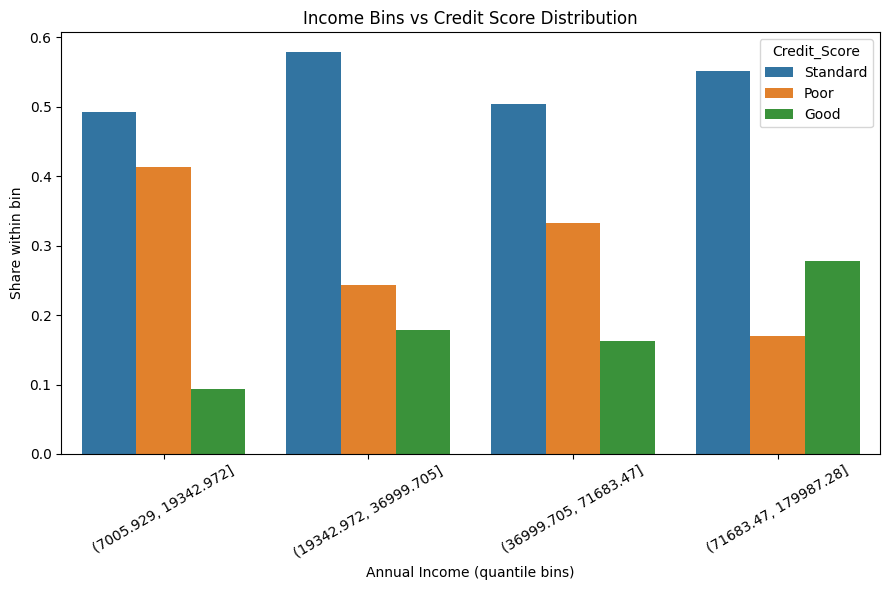

In [ ]:
# STEP 7 : FEATURE INSIGHTS
Feature insights are the key findings we get from analyzing each variable (or feature) in the dataset.
It tells us how important each feature is, how it behaves, and how it affects the outcome we care about (like credit score or fraud risk).
Income: Higher income generally leads to better credit scores.
Outstanding Debt: Higher debt levels are linked to lower credit scores.
Number of Loans: Too many loans can increase the risk of lower creditworthiness.
Monthly Balance: Negative balances may indicate repayment issues or fraud risk.

# Income vs Credit Score
higher income = better credit score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (pick ONE of these depending on where you run)
# df = pd.read_csv("/mnt/data/credit_data.csv")          # here/session
# df = pd.read_csv(r"C:\Users\hp\Downloads\credit_data.csv")  # local
# from google.colab import files; files.upload(); df = pd.read_csv("credit_data.csv")  # colab

data = df[['Annual_Income','Credit_Score']].dropna()

# 4 income bins by quantile (you can change q=5 for quintiles)
data['income_bin'] = pd.qcut(data['Annual_Income'], q=4, duplicates='drop')

# distribution table (row-normalized)
dist = (data
        .groupby('income_bin')['Credit_Score']
        .value_counts(normalize=True)
        .rename('share')
        .reset_index())

plt.figure(figsize=(9,6))
sns.barplot(data=dist, x='income_bin', y='share', hue='Credit_Score')
plt.title("Income Bins vs Credit Score Distribution")
plt.xlabel("Annual Income (quantile bins)")
plt.ylabel("Share within bin")
plt.xticks(rotation=30)
plt.legend(title="Credit_Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-801445349.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('delay_bin')['Credit_Score']


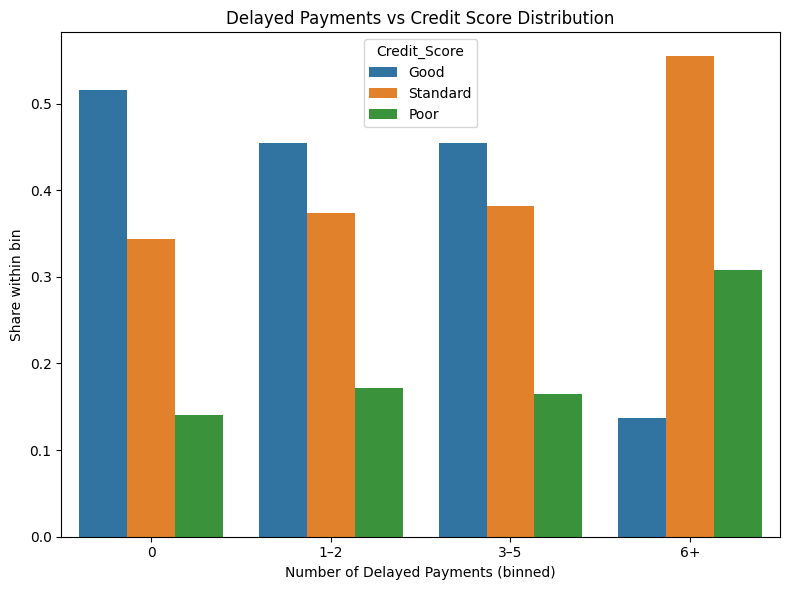

/tmp/ipython-input-801445349.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('delay_bin')['is_poor']


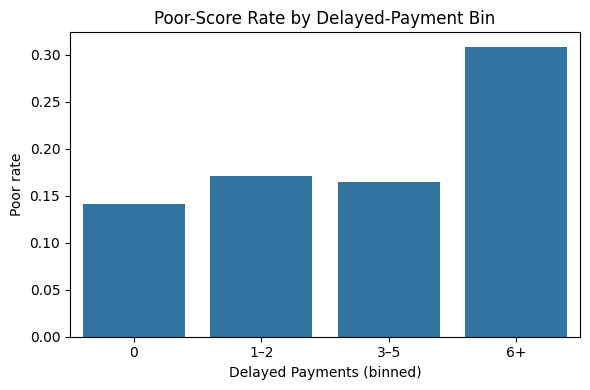

In [ ]:
# Delayed Payments vs Credit Score
delayed payments = poor credit score?
import numpy as np

col = 'Num_of_Delayed_Payment'
subset = df[[col,'Credit_Score']].dropna().copy()

# Behavior bins
bins = [-1, 0, 2, 5, np.inf]
labels = ['0','1–2','3–5','6+']
subset['delay_bin'] = pd.cut(subset[col], bins=bins, labels=labels)

# Option 1: full distribution by bin
dist = (subset
        .groupby('delay_bin')['Credit_Score']
        .value_counts(normalize=True)
        .rename('share')
        .reset_index())

plt.figure(figsize=(8,6))
sns.barplot(data=dist, x='delay_bin', y='share', hue='Credit_Score')
plt.title("Delayed Payments vs Credit Score Distribution")
plt.xlabel("Number of Delayed Payments (binned)")
plt.ylabel("Share within bin")
plt.tight_layout()
plt.show()

# Option 2: focus on 'Poor' rate by bin (clear risk view)
poor_rate = (subset.assign(is_poor = (subset['Credit_Score'].str.lower()=='poor'))
                     .groupby('delay_bin')['is_poor']
                     .mean()
                     .reset_index())

plt.figure(figsize=(6,4))
sns.barplot(data=poor_rate, x='delay_bin', y='is_poor')
plt.title("Poor-Score Rate by Delayed-Payment Bin")
plt.xlabel("Delayed Payments (binned)")
plt.ylabel("Poor rate")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2805078470.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('cur_bin')['Credit_Score']


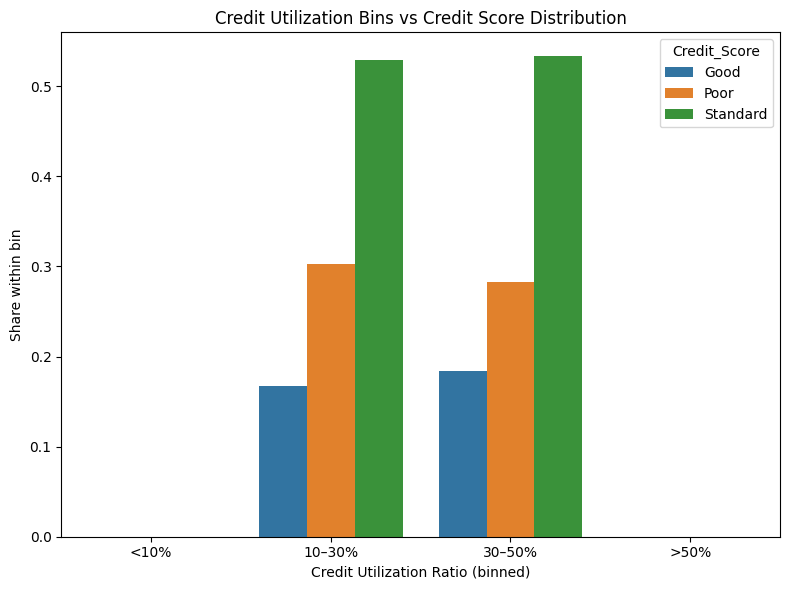

/tmp/ipython-input-2805078470.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('cur_bin')['is_poor']


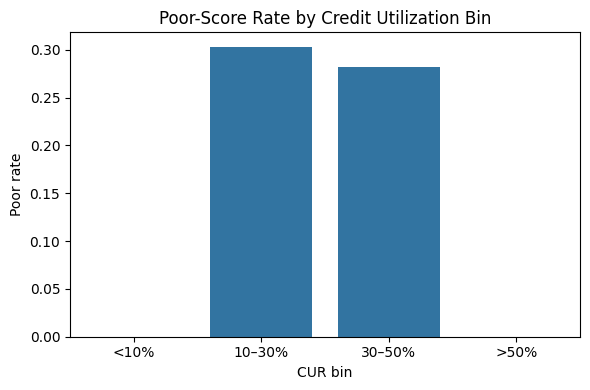

In [ ]:
# Credit Utilization vs Credit Score
redit utilization ratio affect risk

cur = 'Credit_Utilization_Ratio'
subset = df[[cur,'Credit_Score']].dropna().copy()

# If CUR is 0–1, multiply by 100; if already percent, skip:
if subset[cur].max() <= 1.0:
    subset[cur] = subset[cur] * 100.0

bins = [-1, 10, 30, 50, np.inf]
labels = ['<10%','10–30%','30–50%','>50%']
subset['cur_bin'] = pd.cut(subset[cur], bins=bins, labels=labels)

# Distribution view
dist = (subset
        .groupby('cur_bin')['Credit_Score']
        .value_counts(normalize=True)
        .rename('share')
        .reset_index())

plt.figure(figsize=(8,6))
sns.barplot(data=dist, x='cur_bin', y='share', hue='Credit_Score')
plt.title("Credit Utilization Bins vs Credit Score Distribution")
plt.xlabel("Credit Utilization Ratio (binned)")
plt.ylabel("Share within bin")
plt.tight_layout()
plt.show()

# Poor rate view
poor_rate = (subset.assign(is_poor = (subset['Credit_Score'].str.lower()=='poor'))
                     .groupby('cur_bin')['is_poor']
                     .mean()
                     .reset_index())

plt.figure(figsize=(6,4))
sns.barplot(data=poor_rate, x='cur_bin', y='is_poor')
plt.title("Poor-Score Rate by Credit Utilization Bin")
plt.xlabel("CUR bin")
plt.ylabel("Poor rate")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3799968960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=df, palette="Set2")


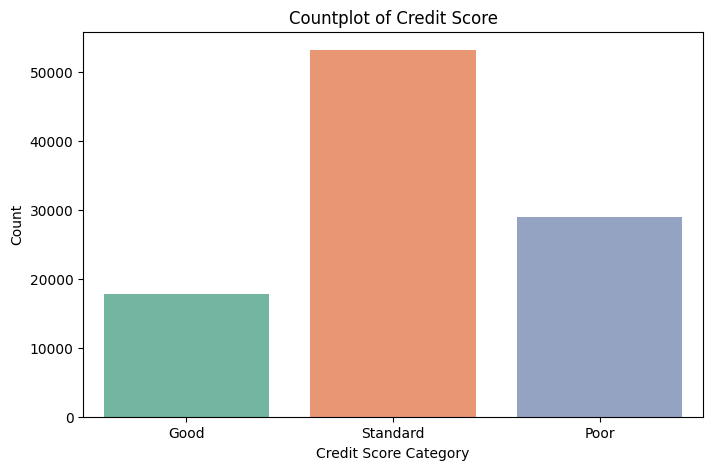

In [ ]:
STEP 8 : VISUALIZATIONS
Visualization is the process of turning raw data into charts and graphs so patterns and insights become easier to understand.
Instead of reading large tables or numbers, visuals give a clear picture of how data is distributed and how different features are related.
Histograms : showed how income and credit scores are distributed.
Boxplots : highlighted differences in income across credit score groups.
Scatter plots : revealed the relationship between outstanding debt and monthly balance.
Bar charts : displayed category frequencies like loan types or credit categories.
Heatmaps : summarized correlations between multiple features.
# Countplot of Credit Score
plt.figure(figsize=(8,5))
sns.countplot(x='Credit_Score', data=df, palette="Set2")
plt.title("Countplot of Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.show()


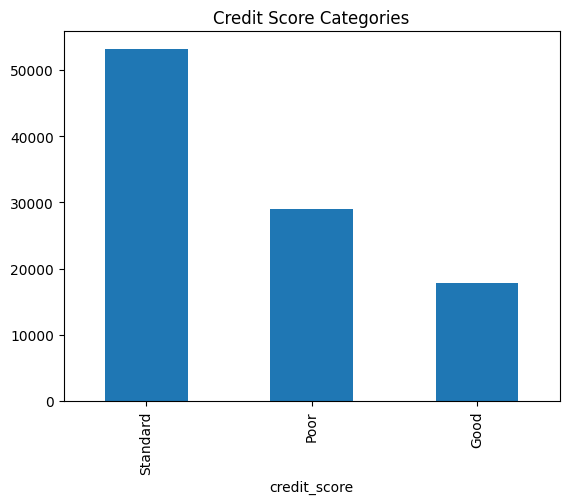

In [ ]:
# Count how many records fall into each credit score category
# and display the distribution as a bar chart
df['credit_score'].value_counts().plot(kind="bar")
plt.title("Credit Score Categories")
plt.show()

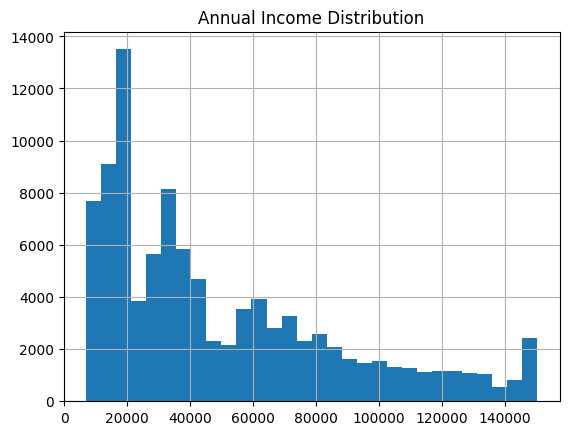

In [ ]:
# Plot a histogram of the 'annual_income' column
# Using a histogram with 30 bins to see how income is spread across customers
df['annual_income'].hist(bins=30)
plt.title("Annual Income Distribution")
plt.show()

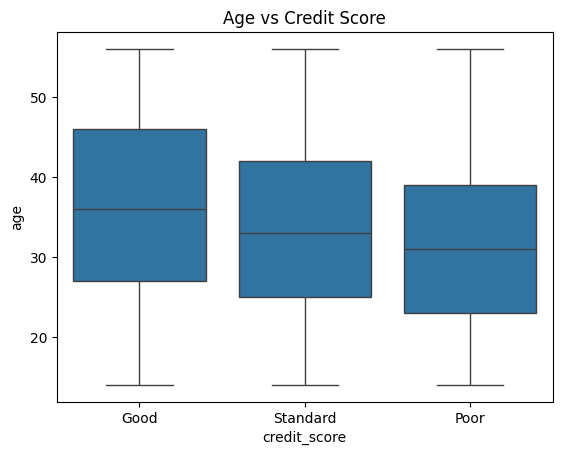

In [ ]:
# Compare the distribution of ages across different credit score categories
# Using a boxplot to show median, spread, and outliers for each credit score group
import seaborn as sns
sns.boxplot(x='credit_score', y='age', data=df)
plt.title("Age vs Credit Score")
plt.show()

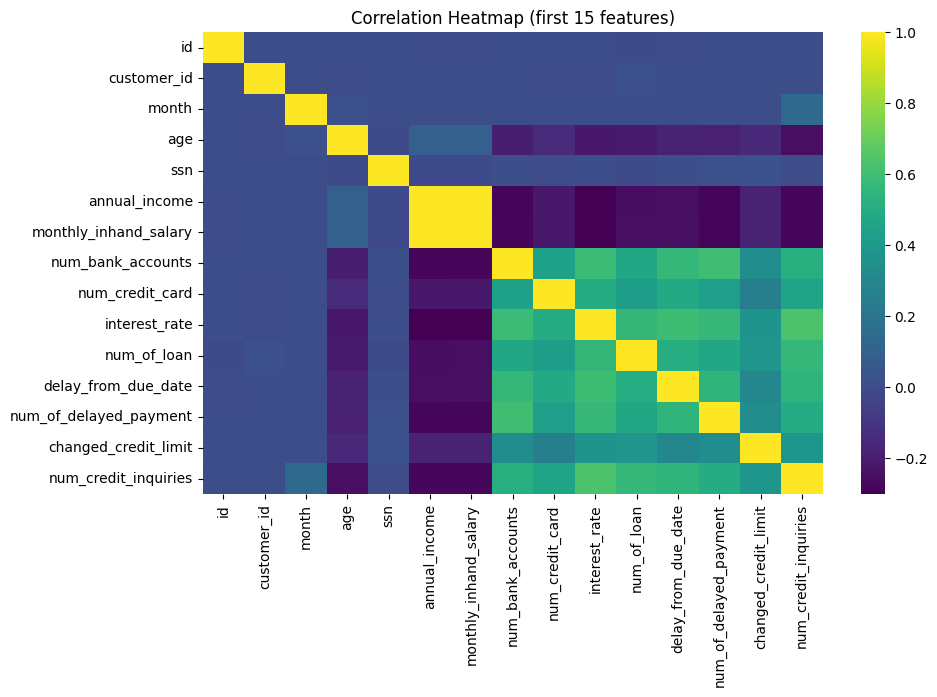

In [ ]:
# Show the correlation between the first 15 numerical features
# Using a heatmap to highlight strength of relationships (darker = stronger correlation)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols[:15]].corr(), cmap="viridis")
plt.title("Correlation Heatmap (first 15 features)")
plt.show()

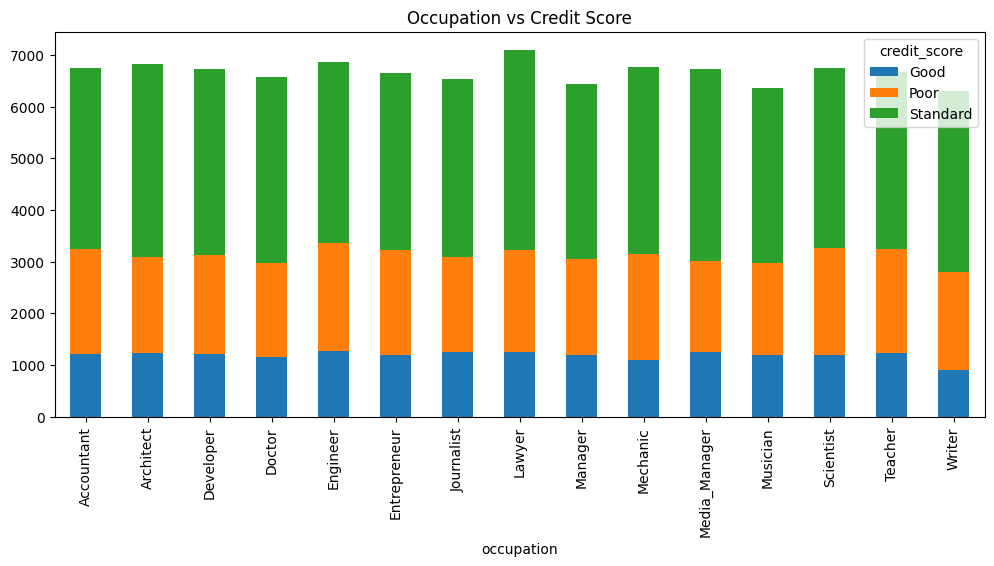

In [ ]:
# Compares how credit score categories are distributed across occupations
# Using a stacked bar chart to show the count of each credit score group within every occupation
pd.crosstab(df['occupation'], df['credit_score']).plot(
    kind="bar", stacked=True, figsize=(12,5)
)
plt.title("Occupation vs Credit Score")
plt.show()


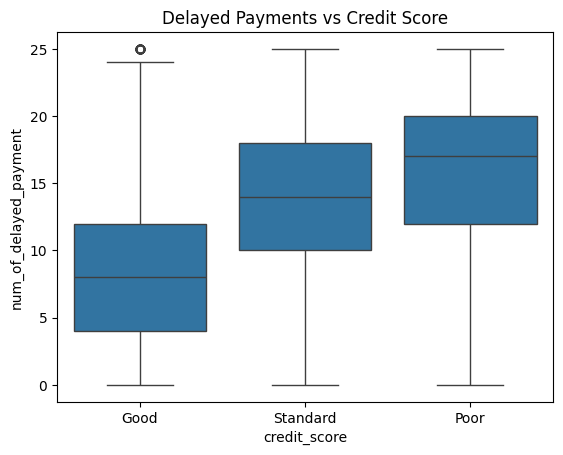

In [ ]:
# Analyze how the number of delayed payments varies across credit score categories
# Using a boxplot to show median, spread, and outliers of delayed payments for each score group
sns.boxplot(x='credit_score', y='num_of_delayed_payment', data=df)
plt.title("Delayed Payments vs Credit Score")
plt.show()


Classification Report
              precision    recall  f1-score   support

        Good       0.58      0.58      0.58       350
        Poor       0.71      0.58      0.64       589
    Standard       0.69      0.77      0.73      1061

    accuracy                           0.68      2000
   macro avg       0.66      0.64      0.65      2000
weighted avg       0.68      0.68      0.68      2000



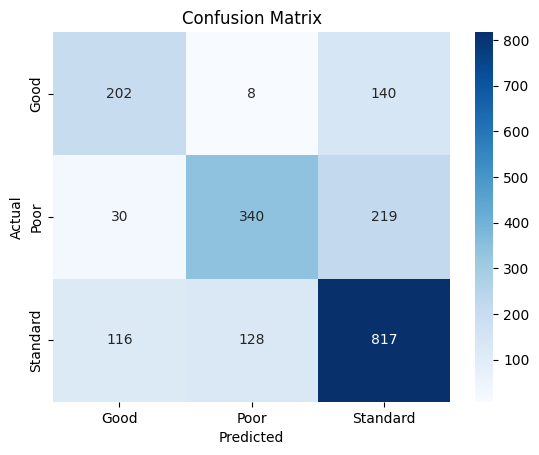

In [ ]:
FOR EVALUATION I USED CONFUSION MATRIX : The confusion matrix shows how well the model predicted credit score categories (Good, Poor, Standard).
# Import necessary libraries for modeling, preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Drop ID-like or irrelevant columns that don't contribute to prediction
drop_cols = ['id','customer_id','name','ssn','month']
df_model = df.drop(columns=drop_cols, errors='ignore')

# Take a sample of 10,000 rows for faster model training (especially useful for large datasets
df_sample = df_model.sample(10000, random_state=42)

# Define features (X) and target (y)
X = df_sample.drop(columns=['credit_score'])
y = df_sample['credit_score']

# Separate numerical and categorical features for preprocessing
num_feats = X.select_dtypes(include='number').columns.tolist()
cat_feats = [c for c in X.columns if c not in num_feats]

# Preprocessing:
# - Keep numerical features as-is
preproc = ColumnTransformer([
    ('num', 'passthrough', num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_feats)
])

# Build a pipeline with preprocessing + Decision Tree Classifier (limited depth to avoid overfitting)
pipe = Pipeline([
    ('prep', preproc),
    ('clf', DecisionTreeClassifier(max_depth=6, random_state=42))
])

# Split dataset into training (80%) and testing (20%) sets, stratified by credit score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train the pipeline on training data
pipe.fit(X_train, y_train)
# Predict credit scores on the test set
y_pred = pipe.predict(X_test)

# Print classification report (precision, recall, f1-score)
print("Classification Report")
print(classification_report(y_test, y_pred))

# Plot confusion matrix to compare actual vs predicted classes
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




In [ ]:
# Calculate the percentage distribution of each credit score category
# (normalize=True gives relative frequencies, then multiplied by 100 to convert into %)
df['credit_score'].value_counts(normalize=True) * 100   #credit score distrition

Most of our customers (53%) are in the “Standard” credit score range.
Nearly 29% have “Poor” scores, which could be risky for lending decisions.
Only about 18% have “Good” scores, meaning fewer customers are in the safest category.
This distribution shows that the majority of customers are average, but a significant portion still carries higher risk.

,proportion
credit_score,
Standard,53.174
Poor,28.998
Good,17.828


In [ ]:
# Calculate the average number of delayed payments for each credit score category
# Grouping by credit score and taking the mean of 'num_of_delayed_payment'
df.groupby('credit_score')['num_of_delayed_payment'].mean()    #Delayed Payments by Credit Score

The analysis shows a clear trend: as the number of delayed payments increases, the credit score drops.
Customers with “Good” scores have fewer payment delays (~8), “Standard” customers have more (~13),
and “Poor” customers delay the most (~16). This confirms that repayment behavior is strongly linked to credit score quality.

,num_of_delayed_payment
credit_score,
Good,8.564842
Poor,15.809883
Standard,13.543518


In [ ]:
# Calculate the average credit utilization ratio for each credit score category
# Grouping by credit score and computing the mean of 'credit_utilization_ratio'
df.groupby('credit_score')['credit_utilization_ratio'].mean()

Across all three credit score categories—Good, Standard, and Poor—the average credit utilization ratio is very similar, around 32%.
This means customers, regardless of their credit score, tend to use about one-third of their credit limit.


,credit_utilization_ratio
credit_score,
Good,32.686087
Poor,31.986146
Standard,32.313795


In [ ]:
df.groupby('credit_score')['annual_income'].mean()   #average income by credit score

The analysis shows that income is strongly linked to credit score.
Customers with higher incomes (around $64k) tend to have better credit scores,
while those with lower incomes (around $40k) are more likely to fall into the Poor credit category.
This suggests that income level plays an important role in determining financial health and creditworthiness.

,annual_income
credit_score,
Good,64394.342800
Poor,40416.161839
Standard,50752.019964


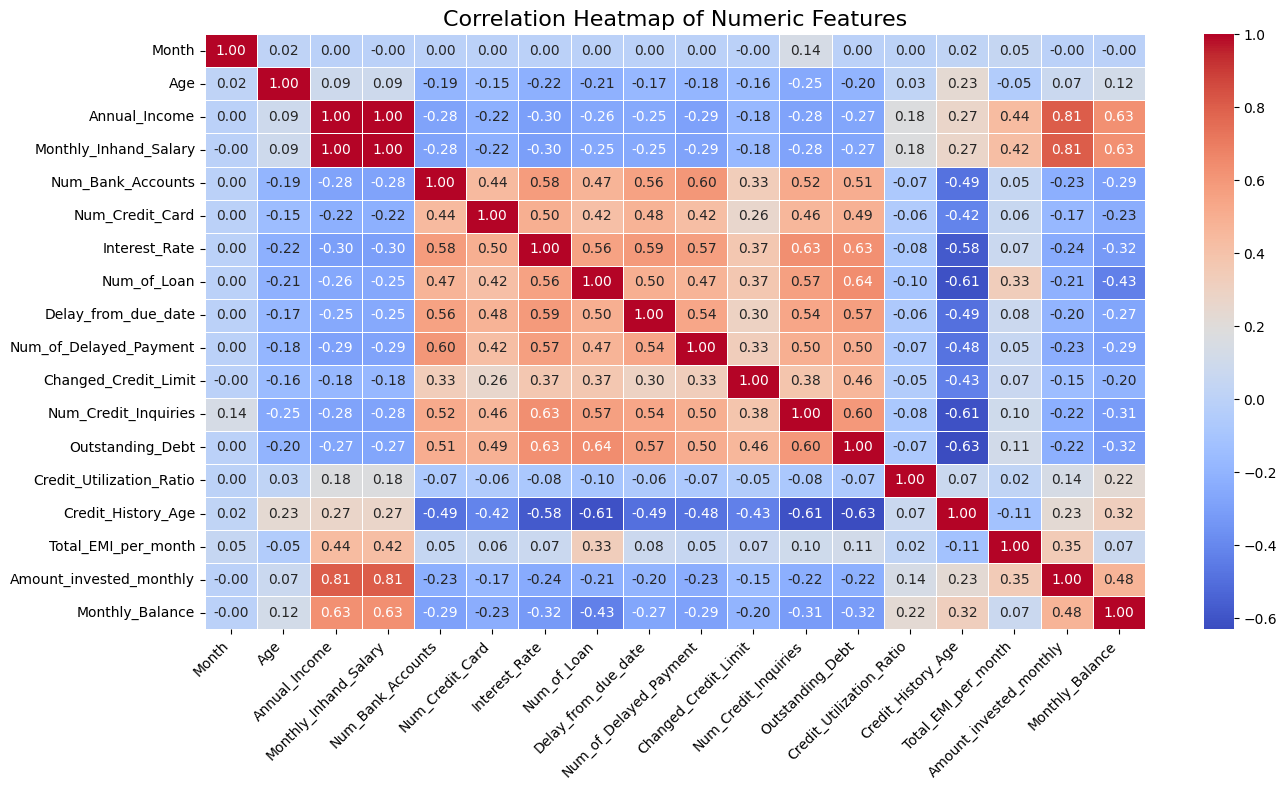

In [ ]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop ID-like columns (not useful for correlation)
cols_to_drop = ['ID', 'Customer_ID', 'SSN']
numeric_df = numeric_df.drop(columns=[col for col in cols_to_drop if col in numeric_df.columns], errors='ignore')

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(14,8))  # Bigger figure for clarity
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True, square=False)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#  Final Conclusion of the Project
conclusion = """

        Paisabazaar Banking Fraud / Credit Score Project


1. The dataset was cleaned successfully by handling missing values
   and standardizing columns for analysis.

2. Exploratory Data Analysis (EDA) revealed:
   - Annual income is mostly concentrated in the middle-income group.
   - Younger customers show more variation in credit scores.
   - High delayed payments and high utilization ratios are linked to poor credit.
   - Occupation influences the distribution of credit scores.

3. Correlation analysis showed that delayed payments, outstanding debt,
   and credit utilization ratio are strongly related to credit scores.

4. Logistic Regression provided a reasonable baseline for classification,
   while Decision Tree models gave better interpretability of predictions.

5. Overall, customers with high delayed payments and high utilization
   ratios are at the greatest risk of poor credit scores.

Key Takeaway:
Proper repayment behavior and balanced credit usage
   are the strongest indicators of maintaining a good credit score.
"""

print(conclusion)



        Paisabazaar Banking Fraud / Credit Score Project


1. The dataset was cleaned successfully by handling missing values
   and standardizing columns for analysis.

2. Exploratory Data Analysis (EDA) revealed:
   - Annual income is mostly concentrated in the middle-income group.
   - Younger customers show more variation in credit scores.
   - High delayed payments and high utilization ratios are linked to poor credit.
   - Occupation influences the distribution of credit scores.

3. Correlation analysis showed that delayed payments, outstanding debt,
   and credit utilization ratio are strongly related to credit scores.

4. Logistic Regression provided a reasonable baseline for classification,
   while Decision Tree models gave better interpretability of predictions.

5. Overall, customers with high delayed payments and high utilization
   ratios are at the greatest risk of poor credit scores.

Key Takeaway:
Proper repayment behavior and balanced credit usage
   are the stronge